# Last time

We looked at Numpy, Matplotlib, and visualizing an image dataset.

# Today

* An important difference between slicing numpy arrays and slicing lists
* Visualizing images (again)
* Histograms

# Slicing: review

In [1]:
# as always:
import numpy as np

Set up a numpy array: 

In [2]:
X = np.array(range(9)).reshape((3,3))
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

We already know slicing syntax:

In [3]:
X[:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [4]:
X[:1]

array([[0, 1, 2]])

In [5]:
X[0:2,1:]

array([[1, 2],
       [4, 5]])

## Setting Values with Slicing

We can also use slicing to set values:

In [6]:
np.zeros([3])

array([ 0.,  0.,  0.])

In [7]:
X[:,1] = np.zeros([3])
X

array([[0, 0, 2],
       [3, 0, 5],
       [6, 0, 8]])

In [8]:
X[0:2,1:] += 10
X

array([[ 0, 10, 12],
       [ 3, 10, 15],
       [ 6,  0,  8]])

# Numpy vs List slicing

Consider how we might use slicing to assign to lists:

In [9]:
xs = [0,1,2,3]
ys = xs[0:2]
print 'xs, ys: ', xs, ys
ys[0] = 999
print 'xs, ys: ', xs, ys

xs, ys:  [0, 1, 2, 3] [0, 1]
xs, ys:  [0, 1, 2, 3] [999, 1]


On the other hand, with numpy arrays:

In [10]:
X = np.array([0,1,2,3])
Y = X[0:2]
print 'X, Y: ', X, Y
Y[0] = 999
print 'X, Y: ', X, Y

X, Y:  [0 1 2 3] [0 1]
X, Y:  [999   1   2   3] [999   1]


With lists, slicing always makes a fresh copy, whereas for numpy arrays, slicing makes a reference to that part of the array (called a 'view' onto the array in numpy parlance). This makes sense because if you have some huge dataset, you don't want to copy the whole dataset when you want to look at a slice of it. 

# Visualizing images (again)

Let's read in an image: 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# download 'gauss.jpg' from the github repository
# you may need to execute 'conda install Pillow' at the command line 
# to be able to use 'imread' on a jpg
G = plt.imread("gauss.jpg")

The image consists of 765 rows, 600 columns, and three RGB channels, i.e. there are three 765 X 600 arrays, one for each of the three colors red, green and blue: 

In [12]:
G.shape

(765, 600, 3)

Let's use `imshow` again to visualize the image: 

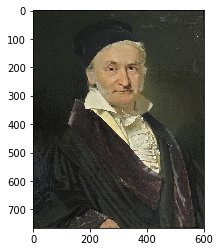

In [13]:
plt.imshow(G)

As expected, the image is colored. To make it grayscale, we can average out the three colors for each pixel:

In [14]:
G_bw = np.apply_along_axis(func1d=np.mean, axis=2, arr=G)

As expected, this reduces the dimensionality of the array, from 3D to 2D: 

In [15]:
G_bw.shape

(765, 600)

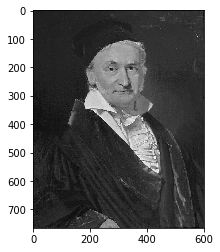

In [16]:
plt.imshow(G_bw, cmap="gray")

# Histograms 

Suppose we want to see how much of each shade of gray there is in the above picture. One way to do this is to look at a histogram. 

First, let's look at the data:

In [17]:
print G_bw[:5,:5]

[[ 22.66666667  25.66666667  27.66666667  27.66666667  25.66666667]
 [ 32.66666667  34.66666667  36.66666667  35.66666667  32.66666667]
 [ 35.66666667  37.66666667  37.66666667  36.66666667  32.66666667]
 [ 33.66666667  34.66666667  35.66666667  33.66666667  30.66666667]
 [ 35.66666667  35.66666667  36.66666667  35.66666667  34.66666667]]


It is a 2D array:

In [18]:
G_bw.shape

(765, 600)

But to create the histogram, we need to 'flatten' these data into a 1D array: 

In [19]:
G_bw_1D = G_bw.reshape(-1)   # if you put -1, it figures out what the shape should be
G_bw_1D.shape

(459000,)

Finally, we don't particularly care about the actual intensity values that the pixels assume. All we care about is how those values are distributed between the maximum and minimum intensities. 

We therefore choose to normalize the data in such a way that the min is 0, the max is 1, and everything else is in between:

In [20]:
G_bw_1D = G_bw_1D - np.min(G_bw_1D)
G_bw_1D = G_bw_1D / np.max(G_bw_1D)
print G_bw_1D[:10]

[ 0.08411215  0.09612817  0.10413885  0.10413885  0.09612817  0.09212283
  0.10413885  0.11615487  0.12416555  0.12016021]


Finally, we are ready to plot our histogram: 

Text(0.5,1,u'Histogram of the array')

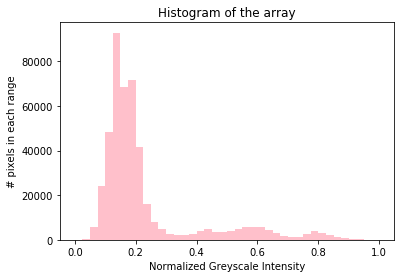

In [21]:
plt.hist(G_bw_1D, bins=40, facecolor='pink')
plt.xlabel('Normalized Greyscale Intensity')
plt.ylabel('# pixels in each range')
plt.title("Histogram of the array")